# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [ ]:
regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/Progetto Advanced Analytics/supermarket_sales.csv', encoding='windows-1254')

# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [ ]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [ ]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [ ]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [ ]:
regression_dataset.info()
regression_dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,30.2085,5.3


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. La colonna "Rating" dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [ ]:
# codice per calcolare la media, mediana e moda della label "Rating"
mean = np.mean(regression_dataset['Rating'])
median = np.median(regression_dataset['Rating'])
mode = scipy.stats.mode(np.array(regression_dataset['Rating']))

## stampa delle statistiche di media, mediana, moda di "Rating"
print(f"The mean is:  {mean: .2f}.\nThe median is:  {median: .2f}.\nThe mode is:  {mode.mode}, with a frequency of {mode.count} occurencies.")

The mean is:   6.97.
The median is:   7.00.
The mode is:  6.0, with a frequency of 26 occurencies.


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [ ]:
# codice per calcolare la deviazione standard della label "Rating"
std_dev = np.std(regression_dataset['Rating'])

#stampa della deviazione standard di "Rating"
print(f'The standard deviation is: {std_dev: .4f}')

The standard deviation is:  1.7177


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

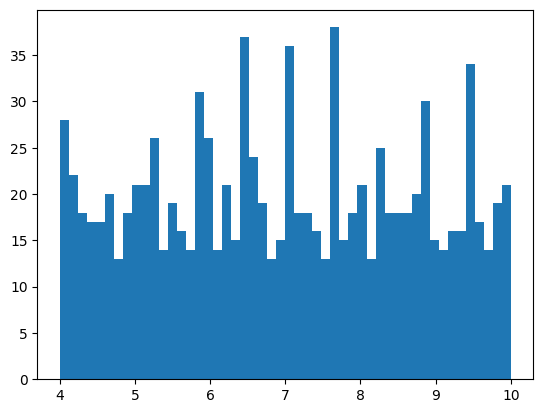

In [ ]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

AGGIUNTA: Possiamo vederne la distribuzione anche corredata di **`mean, mode` e `median`**

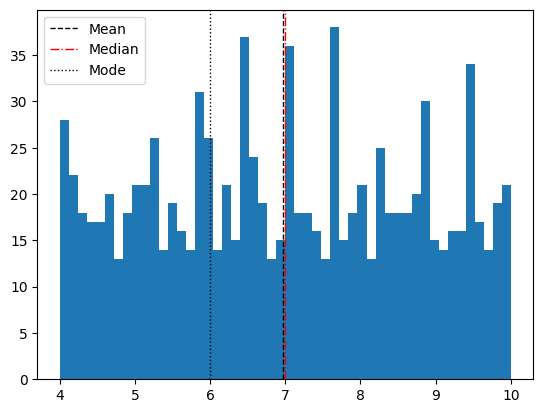

In [ ]:
#histogram plot con aggiunta delle line di media, mediana e moda di "Rating"
plt.hist(regression_dataset['Rating'], 50)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='r', linestyle='dashdot', linewidth=1, label='Median')
plt.axvline(mode.mode, color='k', linestyle='dotted', linewidth=1, label='Mode')

plt.legend()
plt.show()

Il discorso è invece diverso per l'utile lordo:

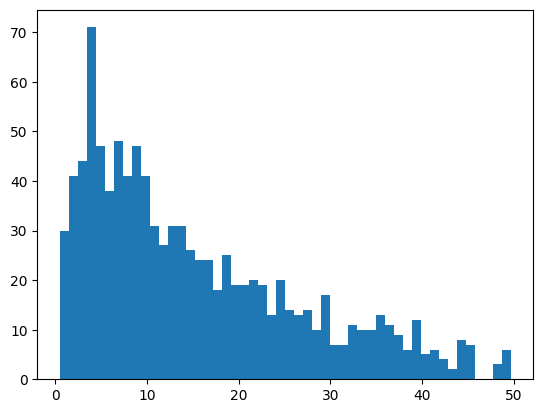

In [ ]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [ ]:
# Codice per calcolare la skewness del gross income
skewness = scipy.stats.skew(regression_dataset['gross income'], bias=True)
print(f"Evaluating the skewness [asimmetria]: {skewness: .4f}.\nConsidering the value of skewness greater than zero,\nit means there's more weight in the\nright tail of distribution.")
print("\nIt's an Unimodal distribution, with a POSITIVE SKEWNESS.")


Evaluating the skewness [asimmetria]:  0.8912.
Considering the value of skewness greater than zero,
it means there's more weight in the
right tail of distribution.

It's an Unimodal distribution, with a POSITIVE SKEWNESS.


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [ ]:
# codice per effettuare l'enconding delle variabili categoriche
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#features list definition
cat_features = ['Branch','City','Customer type','Gender','Product line','Payment']
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

#ColumnTransformer definition
ct = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, cat_features)
         ]
)

#Pandas DF config
ct.set_output(transform="pandas")

#local transform exec
new_regression_dataset = ct.fit_transform(regression_dataset)

# Removing "cat__" prefix form column's name
new_regression_dataset.columns = new_regression_dataset.columns.str.replace('cat__', '', regex=False)

new_regression_dataset

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [ ]:
# codice per effettuare la standardizzazione della colonna "Unit price" e "gross income"
from sklearn.preprocessing import StandardScaler

#StandardScaler initalization
Scaler = StandardScaler()

#Pandas DF config
Scaler.set_output(transform="pandas")

#'Unit price' and 'gross income' standardization
std_regression_dataset = Scaler.fit_transform(regression_dataset[['Unit price','gross income']])
std_regression_dataset

#recovering categorical, feature scaling and Label vars 'Rating' with a new handling
new_regression_dataset[['Unit price','gross income']] = std_regression_dataset[['Unit price','gross income']]
new_regression_dataset[['Rating']] = regression_dataset[['Rating']]
new_regression_dataset



,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,...,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Unit price,gross income,Rating
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.718160,0.919607,9.1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.525303,-0.987730,9.6
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.352781,0.071446,7.4
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.096214,0.675780,8.4
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.156959,1.267125,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.578600,-1.141750,6.2
996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.574989,2.846340,4.4
997,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.899958,-1.178109,7.7
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.383208,-1.032932,4.1


# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [ ]:
from sklearn.model_selection import train_test_split

# codice per splittare il dataset in training set e test set

#independent vars/features [regressors] and dependent var [Label] splitting
X = new_regression_dataset.drop(columns=['Rating'])
y = new_regression_dataset['Rating']


#Train-Test split procedure
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


#print dimensions
print("Training Set dimension:")
print(X_train.shape, y_train.shape)

print("Test Set dimension:")
print(X_test.shape, y_test.shape)

Training Set dimension:
(800, 21) (800,)
Test Set dimension:
(200, 21) (200,)


# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

In [ ]:
# training del modello con la linear regression
from sklearn.linear_model import LinearRegression

#model Initialization and Training
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)


#print 'intercept'!=0 and coefficients
print('Linear Model Coefficients (b(i)...b(n)):', regressor.coef_) #slope
print('Linear Model Coefficient (b0):', regressor.intercept_) #intercept


#model prediction
y_predict = regressor.predict(X_test)

Linear Model Coefficients (b(i)...b(n)): [-1.21164474e+13 -2.92496297e+13 -8.09481129e+12  2.21409240e+13
  9.86105621e+11  5.00774178e+12  9.76178561e+12  9.76178561e+12
 -7.15496599e+13 -7.15496599e+13 -1.28254291e+13 -1.28254291e+13
 -1.28254291e+13 -1.28254291e+13 -1.28254291e+13 -1.28254291e+13
 -2.41893372e+13 -2.41893372e+13 -2.41893372e+13  2.58789062e-02
 -9.74121094e-02]
Linear Model Coefficient (b0): 105911346272577.66


Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [ ]:

#Import R-squared, MSE and MAE to evaluate the accuracy of the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#R-squared estimation
r2_score = r2_score(y_test, y_predict)

#MSE and MAE estimation
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test,y_predict)


#print of the results
print('R-squared score =', r2_score)
print('MSE =', MSE, '\nMAE =', MAE)

print('\n\nGiving a look to the accuracy of the statistical\nmodel and the MSE and MAE estimation,')
print("it's quite clear this model doesn't fit perfectly\nthe distribution.")

R-squared score = -0.015457592014228583
MSE = 3.11522080078125 
MAE = 1.5273124999999999


Giving a look to the accuracy of the statistical
model and the MSE and MAE estimation,
it's quite clear this model doesn't fit perfectly
the distribution.


# Polynomial Regression

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

In [ ]:
# training del modello con la polynomial regression
from sklearn.preprocessing import PolynomialFeatures

#polynomial Features creation
poly_regressor = PolynomialFeatures(degree=2, include_bias=False)

#Test and Train features transformation
X_train_poly = poly_regressor.fit_transform(X_train)
X_test_poly = poly_regressor.transform(X_test)

#Model initialization and Training
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)


#prediction of the model
y_predict = regressor.predict(X_test_poly)


Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

In [ ]:
#MSE and MAE estimation
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test,y_predict)

#print of the results
print('MSE =', MSE, '\nMAE =', MAE)
print("\nIt seems that the polynomial regression doesn't help to improve the MSE and MAE scores.")

MSE = 3.525826025390625 
MAE = 1.5807187499999997

It seems that the polynomial regression doesn't help to improve the MSE and MAE scores.


Sembra che la **`polynomial regression`** non aiuti a migliorare gli score **`MSE` e `MAE`**

# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [ ]:
# codice per importare il dataset apple_quality
classification_dataset = pd.read_csv('/content/drive/MyDrive/Progetto Advanced Analytics/apple_quality.csv')

Ti suggeriamo quindi  di printare le prime 50 righe...

In [ ]:
# codice per print delle prime 50 righe
classification_dataset.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


... e dei metadati delle colonne:

In [ ]:
# codice per visualizzare i principali metadata del dataset apple_quality
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Risulta **una riga in più**: nella cella della colonna **`Acidity`** in fondo al dataset sono presenti i crediti del creatore dello stesso. Provvedo a cancellarla. In virtù di questa singolarità, l'import della colonna era classificato come **`Object = String`**. Sapendo che **`Acidity`** è un valore **numerico reale** che misura una grandezza, lo converto poi in un **`numeric`**

In [ ]:
print('Row 4000:\n\n', classification_dataset.iloc[4000])
print("\n\nThe last row shows missing values: there's only\ncredits of dataset's creator. So, I remove it.")

Row 4000:

 A_id                                         NaN
Size                                         NaN
Weight                                       NaN
Sweetness                                    NaN
Crunchiness                                  NaN
Juiciness                                    NaN
Ripeness                                     NaN
Acidity        Created_by_Nidula_Elgiriyewithana
Quality                                      NaN
Name: 4000, dtype: object


The last row shows missing values: there's only
credits of dataset's creator. So, I remove it.


In [ ]:
#drop of rows in which therea are 'NaN' values
classification_dataset.dropna(axis=0, inplace=True)

#then I change the type of 'Acidity' var
classification_dataset['Acidity'] = pd.to_numeric(classification_dataset['Acidity'])
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [ ]:
# codice per effettuare l'enconding della label "Quality"
quality = OneHotEncoder(sparse_output=False)

quality.set_output(transform="pandas")
new_classification_dataset = quality.fit_transform(classification_dataset[['Quality']])

print('Categories: ',quality.categories_,"\n\nSo, two categories! It's a dichotomous one!")

Categories:  [array(['bad', 'good'], dtype=object)] 

So, two categories! It's a dichotomous one!


Essendo una variabile dicotomica, la label viene mappata con **`Good: 1`, `Bad: 0`**

In [ ]:
new_classification_dataset = classification_dataset.copy()

new_classification_dataset['Quality'] = new_classification_dataset['Quality'].map({'good': 1, 'bad': 0})
new_classification_dataset

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [ ]:
# codice per splittare in train/test il dataset apple_quality

#List of vars
vars = ['A_id','Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

#Features and label splitting
X = new_classification_dataset.drop(columns=['Quality','A_id']).values
y = new_classification_dataset.drop(columns=vars).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [ ]:
# codice per trainare il modello usando la logistic regression

from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(random_state= 42)
logistic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [ ]:
from sklearn.metrics import classification_report

y_predict_test = logistic_regressor.predict(X_test)

print(classification_report(y_test, y_predict_test))
print('\n\nThe current average precision and recall and F1-score are under the threshold.')

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



The current average precision and recall and F1-score are under the threshold.


Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

Confusion Matrix: 

 [[303  98]
 [ 99 300]] 




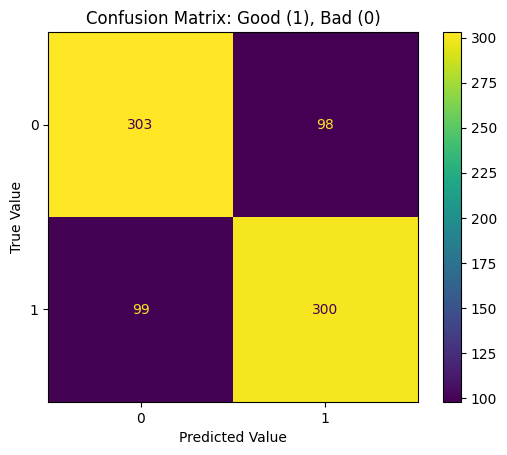

In [ ]:
# codice per la confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#definition and printing of confusion matrix
cm = confusion_matrix(y_test, y_predict_test,labels=logistic_regressor.classes_)
print('Confusion Matrix: \n\n',cm,'\n\n')

#plot of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regressor.classes_)

disp.plot()
plt.title('Confusion Matrix: Good (1), Bad (0)')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.show()

# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

In [ ]:
# training del modello con un decision tree
from sklearn.tree import DecisionTreeClassifier


#definition od the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=8, ccp_alpha=0.001)
clf = clf.fit(X_train, y_train)

#prediction
y_predict_test = clf.predict(X_test)

#print report
print(classification_report(y_test, y_predict_test))
print('\n\nThe current average precision and recall and F1-score are atleast on the threshold.')
print('Decision Tree could be a better model than Logistic Regression')

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       401
           1       0.81      0.81      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



The current average precision and recall and F1-score are atleast on the threshold.
Decision Tree could be a better model than Logistic Regression


**`Precision`, `Recall` e `F1-score`** sono almeno sopra la soglia. **L'albero delle decisioni potrebbe essere un modello migliore della Regressione Logistica**.

E poi alla costruzione della confusion matrix:

Confusion Matrix: 

 [[327  74]
 [ 76 323]] 




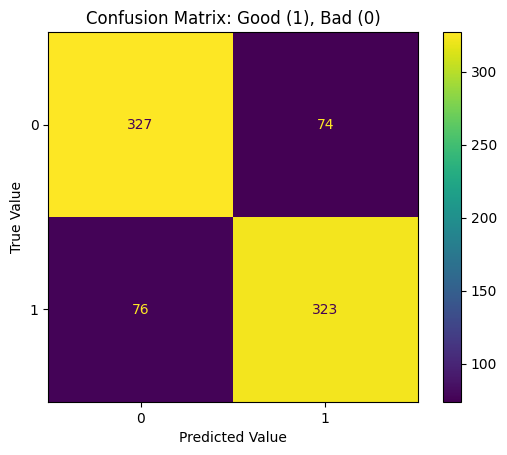

In [ ]:

# confusion matrix del decision tree

#definition and print of the confusion matrix
cm = confusion_matrix(y_test, y_predict_test,labels=clf.classes_)
print('Confusion Matrix: \n\n',cm,'\n\n')

#plotting of the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title('Confusion Matrix: Good (1), Bad (0)')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

plt.show()

Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

Sono di meno: il modello **Decision Tree** riuscirebbe a predire meglio le osservazioni con Y reale pari a **`0 = bad`** e pari a **`1 = Good`**.
#### - **24 osservazioni reali `=0`** in più sono predette correttamente **`303 -> 327`**
#### - **23 osservazioni reali `=1`** in più sono predette correttamente **`300 -> 323`**

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

[0.16968248 0.08105919 0.17787157 0.03960871 0.13184774 0.24354221
 0.1563881 ]
                    0
Ripeness     0.243542
Sweetness    0.177872
Size         0.169682
Acidity      0.156388
Juiciness    0.131848
Weight       0.081059
Crunchiness  0.039609


<Axes: >

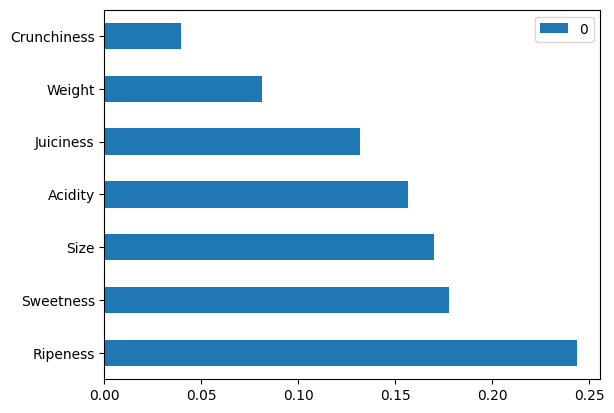

In [ ]:
# codice per la feature importance

#definition of feature's names of the column's list
feature_names = new_classification_dataset.drop(columns=['Quality','A_id']).columns
feature_names

#print of feature importances
print(clf.feature_importances_)

#printing of feature importances with labels and with descending order
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
print(feature_importance)

#feature importances plot
feature_importance.plot(kind='barh')

Valutando la **Feature importance** sembra esserci una Feature (**`Ripeness`**) che han un leggera maggior rilevanza (**`24.35%`**), rispetto ad **`Sweetness, Size, Acidity`** che hanno una rilevanza media (**`17,79%, 16,97%, 15,64%` rispettivamente**), con **`Juiciness`** in posizione di quasi rincalzo (**`13,18%`**). **`Weight, Crunchiness`**, infine, si mostrano come le Feature con minor impatto in termini di contribuzione a spiegare la classificazione **`Good - Bad`** (**`8,11% e 3,96%` rispettivamente**)

# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [ ]:
clustering_dataset = classification_dataset.drop(columns=['Quality'])

Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [ ]:
# codice per trainare il modello con K-Means Clustering
from sklearn.cluster import KMeans

#vars of the features
vars = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

#KMeans implementation and fitting
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(clustering_dataset[vars])



KMeans(n_clusters=2, n_init='auto', random_state=0)

Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [ ]:
# codice per effettuare la predizione su una mela dalle carattetistiche a piacere
print(kmeans.labels_,'\n\n')

#definition of input Features
comb1 = [0.3, -1.7, 0.13, -1.16, 1.27, -0.80, 1.6]
comb2 = [-2.7, -2.2,	-2.4,	0.66,	2.20,	4.75,	-1.33]

#print of the predictions and the center coordinates of the clusters
print('Prediction Result: ',kmeans.predict([comb1, comb2]),'\n\n')
print('The center of the two clusters is the linear combination of: \n\n',kmeans.cluster_centers_)

[0 0 1 ... 0 0 1] 


Prediction Result:  [1 0] 


The center of the two clusters is the linear combination of: 

 [[-1.08393894 -0.9698497  -0.54062517  0.86910697 -0.04327201  1.19318281
  -1.16909115]
 [ 0.31000061 -1.01711268 -0.37230687  1.14834136  1.2893974  -0.47425661
   1.82063518]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

Settando valori delle Features molto prossimi a mele classificate come **`Buona = 1` e `cattiva = 0`**, la prima risulta **`buona = 1`**, la seconda **`cattiva = 0`**

### **Ora testiamo la possibilità di clusterizzazione `n_cluster = 3`**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(clustering_dataset[vars])

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [ ]:

print(kmeans.labels_,'\n\n')

#definition of input Features
comb3 = [-4.00,	-1.78,	2.37,	-0.20,	2.16,	0.21,	-2.23]

#print of the predictions and the center coordinates of the clusters
print('Prediction Result: ',kmeans.predict([comb1, comb2, comb3]),'\n\n')
print('The center of the three clusters is the linear combination of: \n\n',kmeans.cluster_centers_)

[2 2 1 ... 0 2 1] 


Prediction Result:  [1 0 2] 


The center of the three clusters is the linear combination of: 

 [[-0.04256871 -0.93149912 -1.7977324   1.20438794 -0.65540869  1.3175057
  -0.76871593]
 [ 0.46307209 -1.05415241 -0.37233554  0.94160439  1.65112945 -0.75281092
   2.10311054]
 [-2.12270664 -1.00181521  1.22998389  0.73351974  0.92406316  0.67448446
  -0.86166096]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Dopo questa ulteriore prova, sembrerebbe realistico poter clusterizzare le mele attraverso una **tripla codifica**: **`buona`,`intermedia`,`non buona`**

# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [ ]:
# codice per costruire un nuovo dataset, partendo da regression_raw_dataset, con solo le colonne "Date" e "gross income"
timeseries_dataset = regression_raw_dataset[['Date','gross income']]
timeseries_dataset

,Date,gross income
0,1/5/2019,26.1415
1,3/8/2019,3.8200
2,3/3/2019,16.2155
3,1/27/2019,23.2880
4,2/8/2019,30.2085
...,...,...
995,1/29/2019,2.0175
996,3/2/2019,48.6900
997,2/9/2019,1.5920
998,2/22/2019,3.2910


Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

In [ ]:
from datetime import datetime

#print of datadet info
print(timeseries_dataset.info())

#checking of the timeseries
timeseries_dataset = timeseries_dataset.sort_values(by='Date', ascending=True)
timeseries_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   gross income  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB
None


,Date,gross income
496,1/1/2019,6.3220
484,1/1/2019,18.4900
567,1/1/2019,29.5830
523,1/1/2019,6.2870
970,1/1/2019,42.3150
...,...,...
393,3/9/2019,26.1300
73,3/9/2019,22.7730
433,3/9/2019,33.4390
585,3/9/2019,10.3420


Adottando la strategia di mantenere le sole colonne di **`Date`** e **`gross income`**, si rammenti che il valore del **reddito lordo** è relativo al singolo **`Invoice id`**, ovvero alla **singola operazione di vendita**. Occorrerà, dunque, rendere la **misurazione giornaliera univoca** (in quanto non vi sono ulteriori granularità volte a specificare più nel dettaglio l'informazione [ora, minuti, secondi], o meglio, vi è il campo **`Time`** che però non viene menzionato **nelle direttive** dell'operazione di **selezione**, quindi si opera per una **granularità giornaliera**), per poter associare le **predizioni** alle righe con i valori misurati in quel giorno [**`train` o `test`**] e non incorrere nel problema di **`duplicates`** in fase di merge tra il **dataset dei valori misurati** e **il dataset di quelli predetti** [non avendo una chiave univoca **`Date`** per lo stesso giorno {sono più **`Ivoice id`** emesse nello stesso giorno}]. Si opta per la **`MEDIA mean()`** dei **`gross income`** giornalieri, **a prescindere dalla natura** dell'oggetto con cui si è ottenuto il reddito lordo.

#### Dapprima costruisco la **media giornaliera `mean`** dei **`gross income`** usando un **`groupby`** e trasformo il campo
#### - in un campo **`date`** e
#### - nell'**indice** del DataFrame

In [ ]:
timeseries_dataset = timeseries_dataset.groupby(timeseries_dataset['Date']).mean()
timeseries_dataset.index = pd.to_datetime(timeseries_dataset.index)

timeseries_dataset

,gross income
Date,
2019-01-01,18.830083
2019-01-10,18.841000
2019-01-11,12.589063
2019-01-12,22.444864
2019-01-13,11.672400
...,...
2019-03-05,17.453441
2019-03-06,13.387864
2019-03-07,7.609833


#### Definisco un metodo **`create_features`** in modo tale da estrarre ed immagazzinare qualunque informazione della data che possa incidere sul **`reddito giornaliero`**

In [ ]:

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

#creation od an instance in the timeseries_datadet
timeseries_dataset = create_features(timeseries_dataset)

timeseries_dataset.head()

,gross income,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2019-01-01,18.830083,1,1,1,2019,1,1,1
2019-01-10,18.841000,3,1,1,2019,10,10,2
2019-01-11,12.589063,4,1,1,2019,11,11,2
2019-01-12,22.444864,5,1,1,2019,12,12,2
2019-01-13,11.672400,6,1,1,2019,13,13,2


#### Per il **`CAMPIONAMENTO`** di **`Test`** e **`Train`** decido di sfruttare la **ratio** della **Frequenza Relativa Cumulata** e la soglia del 75-80%, percentuale raccomandata, come criterio per lo split **`Train - Test`**

In [ ]:
#summary of number of observation, by week
count = timeseries_dataset.groupby(timeseries_dataset['weekofyear']).size().to_frame()
count = count.rename(columns={0: 'Count'})

# Relative frequency
count['RF'] = count['Count'] / count['Count'].sum()
# Cumulative relative frequency
count['CRF'] = count['RF'].cumsum()



count

,Count,RF,CRF
weekofyear,,,
1,6,0.067416,0.067416
2,7,0.078652,0.146067
3,7,0.078652,0.224719
4,7,0.078652,0.303371
5,7,0.078652,0.382022
6,7,0.078652,0.460674
7,7,0.078652,0.539326
8,7,0.078652,0.617978
9,7,0.078652,0.696629


Lo scaglione è fra la **10ma e l'11esima settimana**

In [ ]:
#Split the data between 10th and 11th week
split_point = 10
train = timeseries_dataset[timeseries_dataset['weekofyear'] <= split_point].copy()
test = timeseries_dataset[timeseries_dataset['weekofyear'] > split_point].copy()

#re-create date features
train = create_features(train)
test = create_features(test)

print(train.info(), test.info())
print(train, test)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2019-01-01 to 2019-03-09
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gross income  69 non-null     float64
 1   dayofweek     69 non-null     int32  
 2   quarter       69 non-null     int32  
 3   month         69 non-null     int32  
 4   year          69 non-null     int32  
 5   dayofyear     69 non-null     int32  
 6   dayofmonth    69 non-null     int32  
 7   weekofyear    69 non-null     UInt32 
dtypes: UInt32(1), float64(1), int32(6)
memory usage: 3.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-03-11 to 2019-03-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gross income  20 non-null     float64
 1   dayofweek     20 non-null     int32  
 2   quarter       20 non-null     int32  
 3   month         20 non-null     int32  
 4   ye

#### Esplicito le diverse **features temporali** per usarle nel modello e capire la loro **incidenza sul reddito lordo**.

In [ ]:
#definition of FEATURES and TARGET
FEATURES = ['weekofyear','dayofweek','quarter','month','year','dayofyear','dayofmonth']
TARGET = ['gross income']

#FEATURES and TARGET selection
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# training della time series con la linear regression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

#print of incercet and coefficients
print('Linear Model Coefficients (b(i)...b(n)):', regressor.coef_) #slope
print('Linear Model Coefficient (b0):', regressor.intercept_) #intercept

#prediction
test['prediction'] = regressor.predict(X_test)

Linear Model Coefficients (b(i)...b(n)): [[-1.27833991e-02  5.15529919e-02 -1.38777878e-17  7.16474828e-01
   0.00000000e+00 -3.79308020e-02  2.94361468e-02]]
Linear Model Coefficient (b0): [14.93752836]


#### Plot della **time series** e della **`prediction`**

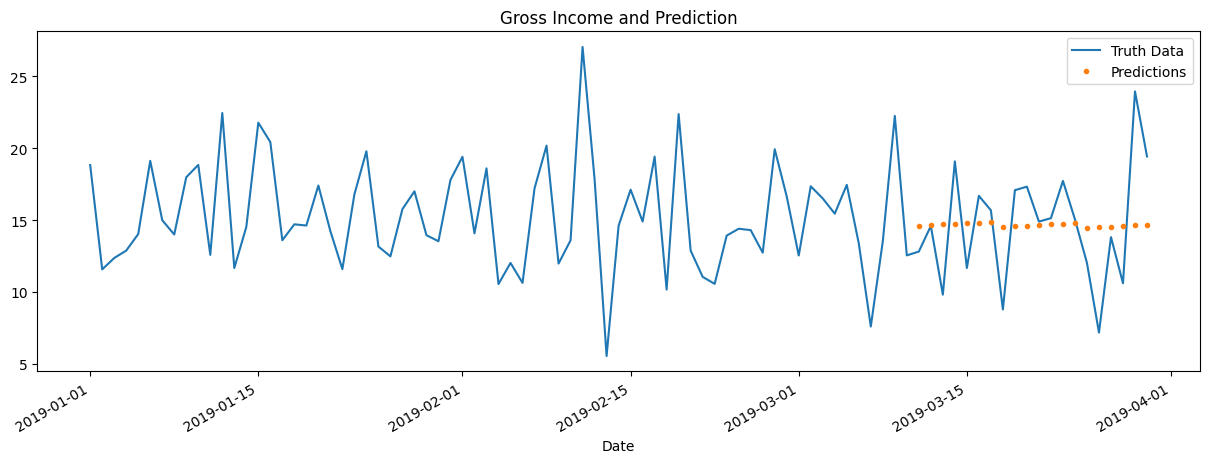

In [ ]:
##merge test set, with prediction on test
timeseries_dataset_test = timeseries_dataset.merge(test[['prediction']], left_index=True, right_index=True, how = 'left')

#Plot della time series
ax = timeseries_dataset_test[['gross income']].plot(figsize=(15, 5))
timeseries_dataset_test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Gross Income and Prediction')
plt.show()


E vai a controllare le solite metriche, cioè MSE ed MAE:

In [ ]:
#MSE and MAE estimation
MAE = mean_absolute_error(y_test, test['prediction'])
MSE = mean_squared_error(y_test,test['prediction'])

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 15.019704486186134 
MAE = 3.0105015459186104


Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

In [ ]:
# (BONUS) training e performance evalutation della time series con XGBoost
import xgboost as xgb

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


[0]	validation_0-rmse:15.27243	validation_1-rmse:14.68816
[100]	validation_0-rmse:13.92893	validation_1-rmse:13.35327
[200]	validation_0-rmse:12.72029	validation_1-rmse:12.15447
[300]	validation_0-rmse:11.63452	validation_1-rmse:11.07995
[400]	validation_0-rmse:10.66077	validation_1-rmse:10.11899
[500]	validation_0-rmse:9.78918	validation_1-rmse:9.26193
[600]	validation_0-rmse:9.01082	validation_1-rmse:8.49996
[700]	validation_0-rmse:8.31752	validation_1-rmse:7.82506
[800]	validation_0-rmse:7.70181	validation_1-rmse:7.22985
[900]	validation_0-rmse:7.15675	validation_1-rmse:6.87320
[999]	validation_0-rmse:6.68034	validation_1-rmse:6.60590


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Predict and plotting

In [ ]:
test.drop(columns = 'prediction', inplace=True)
timeseries_dataset_test.drop(columns = 'prediction', inplace=True)

test['prediction'] = reg.predict(X_test)


##merge test set, with prediction on test
timeseries_dataset_test = timeseries_dataset_test.merge(test[['prediction']], how='left', left_index=True, right_index=True)

timeseries_dataset_test

,gross income,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
Date,,,,,,,,,
2019-01-01,18.830083,1,1,1,2019,1,1,1,NaN
2019-01-10,18.841000,3,1,1,2019,10,10,2,NaN
2019-01-11,12.589063,4,1,1,2019,11,11,2,NaN
2019-01-12,22.444864,5,1,1,2019,12,12,2,NaN
2019-01-13,11.672400,6,1,1,2019,13,13,2,NaN
...,...,...,...,...,...,...,...,...,...
2019-03-05,17.453441,1,1,3,2019,64,5,10,NaN
2019-03-06,13.387864,2,1,3,2019,65,6,10,NaN
2019-03-07,7.609833,3,1,3,2019,66,7,10,NaN


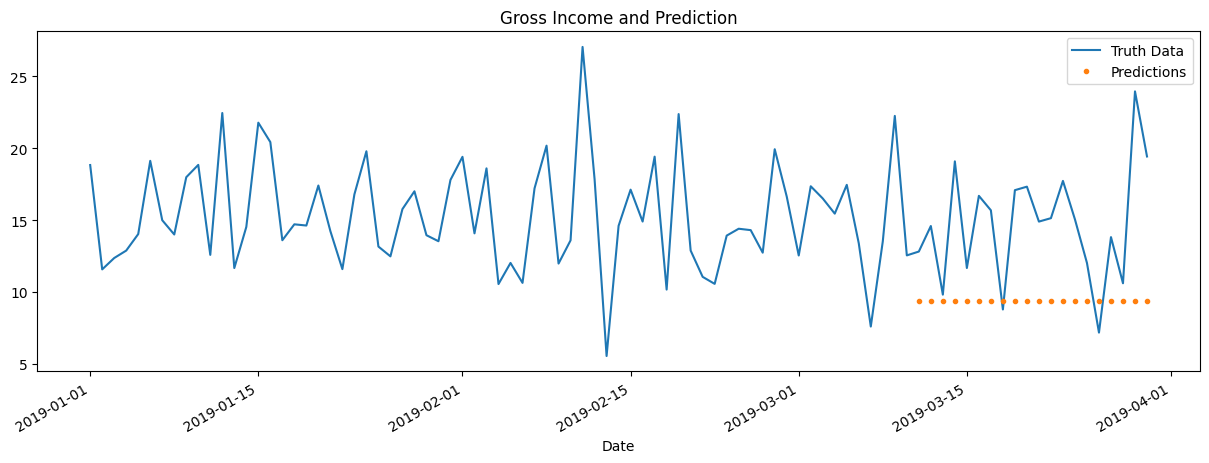

In [56]:
timeseries_dataset_test.notna()
ax = timeseries_dataset_test[['gross income']].plot(figsize=(15, 5))
timeseries_dataset_test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Gross Income and Prediction')
plt.show()